# Text Analysis - HW3

## Scraper

In [45]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import time
import re
from urllib.request import urlopen
import json
from pandas.io.json import json_normalize
import pandas as pd, numpy as np

In [210]:
# Once scroll returns bs4 parsers the page_source
username='zara'
browser = webdriver.Chrome('/Applications/chromedriver')
browser.get('https://www.instagram.com/'+username+'/?hl=en')
Pagelength = browser.execute_script("window.scrollTo(100, document.body.scrollHeight);")

In [105]:
master_df = pd.DataFrame(columns = ['display_url','caption','is_video','likes','comments']) 

In [377]:
import requests

headers = {
    'authority': 'www.instagram.com',
    'accept': '*/*',
    'x-ig-www-claim': 'hmac.AR1Yx08wnRRRtJvVTXyC7RsIw5V1oUBdY_FVX93uwBl6j7v0',
    'x-requested-with': 'XMLHttpRequest',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36',
    'x-csrftoken': '2O8PoxJVPIZ5BfzvYMDuSHJupGNWKKX4',
    'x-ig-app-id': '936619743392459',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    'referer': 'https://www.instagram.com/zara/',
    'accept-language': 'en-US,en;q=0.9',
    'cookie': 'ig_did=F57D0D78-5D43-4222-AFFB-E101783AF66D; mid=X5CaTgAEAAE8kTCqFHTKkr5pJl8B; ig_nrcb=1; csrftoken=2O8PoxJVPIZ5BfzvYMDuSHJupGNWKKX4; ds_user_id=43990799699; sessionid=43990799699%3ADBVUPO0BsdiZ3y%3A17; rur=PRN; urlgen="{\\"2600:1700:291:3d40:138:c8d8:652:e9ba\\": 7018}:1kVL5P:LFn2znRy5MU6r-DIt9z87AAS56M"',
}

params = (
    ('query_hash', '56a7068fea504063273cc2120ffd54f3'),
    ('variables', '{"id":"602725764","first":12,"after":"QVFBaW9jRjlYbnF6TlI1ZnZMSkZsZkpmc2NBakFFS19LRHVPcDZYZEEyX3Q2OElSMFVKNVJoQ1ZMWDhGTWhxVzJDSE40U2NUT21SZl9JQ29NZU14SXR0Uw=="}'),
)

response = requests.get('https://www.instagram.com/graphql/query/', headers=headers, params=params)

#NB. Original query string below. It seems impossible to parse and
#reproduce query strings 100% accurately so the one below is given
#in case the reproduced version is not "correct".
# response = requests.get('https://www.instagram.com/graphql/query/?query_hash=56a7068fea504063273cc2120ffd54f3&variables=%7B%22id%22%3A%22602725764%22%2C%22first%22%3A12%2C%22after%22%3A%22QVFBaW9jRjlYbnF6TlI1ZnZMSkZsZkpmc2NBakFFS19LRHVPcDZYZEEyX3Q2OElSMFVKNVJoQ1ZMWDhGTWhxVzJDSE40U2NUT21SZl9JQ29NZU14SXR0Uw%3D%3D%22%7D', headers=headers)


In [378]:
df = pd.DataFrame(columns = ['display_url','caption','is_video','likes','comments']) 

# GET ALL URLS IN A QUERY_HASH
string = response.text
url = re.findall('display_url":"https:/[^""]*', string)
url=pd.Series(url)
url=url.str.lstrip('\':\"display_url\":\"')
url=url.str.rstrip('\'')
df['display_url']=url

# GET COMMENTS IN A QUERY_HASH
comments= re.findall('edge_media_to_comment":{"count":[^""]*', string)
comments=pd.Series(comments)
comments=comments.str.lstrip('edge_media_to_comment\":{\"count":')
comments=comments.str.rstrip(',\',')
df['comments']=comments

# GET LIKES IN A QUERY_HASH
likes = re.findall('edge_media_preview_like":{"count":[^""]*', string)
likes=pd.Series(likes)
likes=likes.str.lstrip('edge_media_preview_like\":{\"count":')
likes=likes.str.rstrip(',\',')
df['likes']=likes
#df=df.iloc[0:12]

# GET CAPTIONS IN A QUERY_HASH
caption= re.findall('edge_media_to_caption":{"edges":[^}]*', string)
caption=pd.Series(caption)
caption=caption.str.lstrip('edge_media_to_caption\":{\"edges\":[{\"node\":{\"text\":\"')
caption=caption.str.rstrip('\"\',')
df['caption']=caption

# GET IS_VIDEO IN A QUERY_HASH
v_flag= re.findall('is_video":[^"]*', string)
v_flag=pd.Series(v_flag)
v_flag=v_flag.str.lstrip('\'is_video\":')
v_flag=v_flag.str.rstrip(',\',')
df['is_video']=v_flag

master_df = pd.concat([master_df,df]).drop_duplicates().reset_index(drop=True)
master_df

,display_url,caption,is_video,likes,comments
0,https://scontent-dfw5-2.cdninstagram.com/v/t51...,Rib trim fleece romper #zaramini @zarakids,false,90543,755
1,https://scontent-dfw5-1.cdninstagram.com/v/t51...,Mini collection for newborns #zaramini @zarakids,false,102287,462
2,https://scontent-dfw5-2.cdninstagram.com/v/t51...,Fleece coat for newborns #zaramini @zarakids,false,189385,1042
3,https://scontent-dfw5-2.cdninstagram.com/v/t51...,Large denim bucket bag #zarawoman,false,43393,509
4,https://scontent-dfw5-1.cdninstagram.com/v/t51...,Quilted maxi crossbody bag #zarawoman,false,56076,306
...,...,...,...,...,...
630,https://scontent-dfw5-2.cdninstagram.com/v/t51...,White crossbody bag with front pocket @zaraman,false,30141,138
631,https://scontent-dfw5-2.cdninstagram.com/v/t51...,"Trekking sneakers, essential for your day to d...",false,56607,327
632,https://scontent-dfw5-2.cdninstagram.com/v/t51...,Multi-pocket backpack with contrasting colored...,false,34072,131
633,https://scontent-dfw5-2.cdninstagram.com/v/t51...,"@teget is with us this week at @livingzara, wi...",false,83510,476


In [384]:
master_df=master_df.drop_duplicates()
master_df=master_df.dropna()
mask=master_df['is_video']=='false'
no_vids = master_df[mask]
len(no_vids)

507

In [382]:
master_df.to_csv('master_df.csv')
print("Data exported to master_df.csv")
browser.close()

Data exported to master_df.csv


## Google Vision API

In [1]:
import pandas as pd
import numpy as np

from ast import literal_eval
import os

In [19]:
def detect_labels_url(url):
    """Detects labels in the file located in Google Cloud Storage or on the
   Web."""
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.Image()
    image.source.image_uri = url

    response = client.label_detection(image=image)
    labels = response.label_annotations
    return labels

def extract_labels_from_gvision(url):
    """Extracts the labels in the appropriate format."""
    my_labels = detect_labels_url(url)
    my_label_list = list()
    for label in my_labels:
        my_label_list.append(label.description)
    return my_label_list

In [20]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= '/Users/lukestevens/Downloads/service_account.json'

## Read the file with the images and captions from Instagram
df = pd.read_csv("filtered_data.csv")

## Append the labels obtained from Google Vision API to the dataframe
df['labels'] = df['display_url'].apply(extract_labels_from_gvision)
df.to_csv("zara_labels_final.csv")

In [28]:
df['labels']

0      [People, Sitting, Wood, Nativity scene, Child,...
1      [Mammal, Vertebrate, Dog, Canidae, Dog breed, ...
2      [Wool, Child, Skin, Knit cap, Woolen, Beige, H...
3      [Denim, Jeans, Clothing, Blue, Textile, Fashio...
4      [Face, Beauty, Skin, Fashion, Shoulder, Fashio...
                             ...                        
630    [Eyewear, Collar, Neck, Chin, Glasses, Shoulde...
631    [Footwear, Shoe, Ankle, Joint, Leg, Skate shoe...
632    [Shoulder, Bag, Yellow, Joint, Messenger bag, ...
633    [Beauty, Yellow, Fashion, Street fashion, Dog,...
634    [Photograph, Dog, Canidae, Beauty, Companion d...
Name: labels, Length: 635, dtype: object

## Assignment

In [1]:
import pandas as pd
import numpy as np
import nltk
import lda
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils.multiclass import unique_labels
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stopwords = set(stopwords.words('english'))

df = pd.read_csv("zara_labels_final.csv")
df = df.dropna(how="any")
df = df[df["is_video"] == False]
df = df.drop(["Unnamed: 0"], axis = 1)
df = df.reset_index()
df = df.drop(["index"], axis = 1)

df.head()

,display_url,caption,is_video,likes,comments,labels
0,https://scontent-dfw5-2.cdninstagram.com/v/t51...,Rib trim fleece romper #zaramini @zarakids,False,90543,755,"['People', 'Sitting', 'Wood', 'Nativity scene'..."
1,https://scontent-dfw5-1.cdninstagram.com/v/t51...,Mini collection for newborns #zaramini @zarakids,False,102287,462,"['Mammal', 'Vertebrate', 'Dog', 'Canidae', 'Do..."
2,https://scontent-dfw5-2.cdninstagram.com/v/t51...,Fleece coat for newborns #zaramini @zarakids,False,189385,1042,"['Wool', 'Child', 'Skin', 'Knit cap', 'Woolen'..."
3,https://scontent-dfw5-2.cdninstagram.com/v/t51...,Large denim bucket bag #zarawoman,False,43393,509,"['Denim', 'Jeans', 'Clothing', 'Blue', 'Textil..."
4,https://scontent-dfw5-1.cdninstagram.com/v/t51...,Quilted maxi crossbody bag #zarawoman,False,56076,306,"['Face', 'Beauty', 'Skin', 'Fashion', 'Shoulde..."


### Task A

In [2]:
# Functions to normalize likes and comments

def normal_likes(s):
    return s / df["likes"].max()

def normal_comments(s):
    return s / df["comments"].max()


# Function to create binary engagement

def high_low(row):
    if row['engagement'] > df['engagement'].median():
        return 1
    else:
        return 0

In [3]:
# Creates new columns in the df

df["n_likes"] = df["likes"].apply(normal_likes)
df["n_comments"] = df["comments"].apply(normal_comments)
df["engagement"] = df["n_likes"] * 0.4 + df["n_comments"] * 0.6
df['high_low'] = df.apply(lambda row: high_low(row), axis = 1)

df.head()

,display_url,caption,is_video,likes,comments,labels,n_likes,n_comments,engagement,high_low
0,https://scontent-dfw5-2.cdninstagram.com/v/t51...,Rib trim fleece romper #zaramini @zarakids,False,90543,755,"['People', 'Sitting', 'Wood', 'Nativity scene'...",0.308919,0.232594,0.263124,1
1,https://scontent-dfw5-1.cdninstagram.com/v/t51...,Mini collection for newborns #zaramini @zarakids,False,102287,462,"['Mammal', 'Vertebrate', 'Dog', 'Canidae', 'Do...",0.348988,0.142329,0.224993,1
2,https://scontent-dfw5-2.cdninstagram.com/v/t51...,Fleece coat for newborns #zaramini @zarakids,False,189385,1042,"['Wool', 'Child', 'Skin', 'Knit cap', 'Woolen'...",0.646153,0.321010,0.451068,1
3,https://scontent-dfw5-2.cdninstagram.com/v/t51...,Large denim bucket bag #zarawoman,False,43393,509,"['Denim', 'Jeans', 'Clothing', 'Blue', 'Textil...",0.148050,0.156808,0.153305,1
4,https://scontent-dfw5-1.cdninstagram.com/v/t51...,Quilted maxi crossbody bag #zarawoman,False,56076,306,"['Face', 'Beauty', 'Skin', 'Fashion', 'Shoulde...",0.191323,0.094270,0.133091,0


### Task B

In [4]:
def cmatrix(y_true, y_pred, classes, normalize = True, cmap = plt.cm.Blues):
    
    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.figure(figsize = (8, 4))
    
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.colorbar()
    
    plt.xticks = np.arange(cm.shape[1])
    plt.yticks = np.arange(cm.shape[0])
    
    fmt = '.2f'
    thresh = cm.max() / 2.
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt), ha = "center", va = "center", color = "black")# if cm[i, j] > thresh else "black")
    return plt

In [5]:
label_str = df['labels'].astype(str)
caption_str = df['caption'].astype(str)
vectorizer = TfidfVectorizer()
c_tfidf = vectorizer.fit_transform(caption_str)
l_tfidf = vectorizer.fit_transform(label_str)

Accuracy Score: 0.5490196078431373


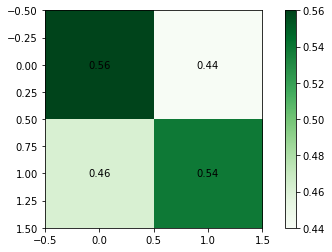

In [6]:
# Logistic Regression/Confusion Matrix
    # engagement (binary) - dependent variable
    # 'labels' - independent variable

x1 = l_tfidf
y1 = df["high_low"]

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 50)

lr1 = LogisticRegression().fit(X_train, y_train)
y1_pred = lr1.predict(X_test)

print("Accuracy Score: " + str(accuracy_score(y_test, y1_pred)))

cmatrix(y_test, y1_pred, classes = np.unique(y_test), normalize = True, cmap = plt.cm.Greens)
plt.show()

Accuracy Score: 0.7745098039215687


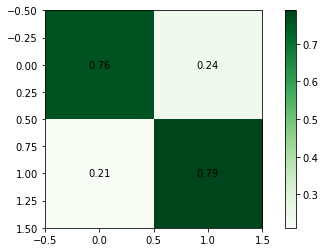

In [7]:
# Logistic Regression/Confusion Matrix
    # engagement (binary) - dependent variable
    # 'caption' - independent variable

x2 = c_tfidf
y2 = df["high_low"]

X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 50)

lr2 = LogisticRegression().fit(X_train, y_train)
y2_pred = lr2.predict(X_test)

print("Accuracy Score: " + str(accuracy_score(y_test, y2_pred)))

cmatrix(y_test, y2_pred, classes = np.unique(y_test), normalize = True, cmap = plt.cm.Greens)
plt.show()

In [8]:
def word_split(s):
    s = re.findall(r'\w+',s)
    return s

df['caption_label'] = df['labels'] + df['caption']
df['caption_label'] = df['caption_label'].map(word_split)
df['caption_label'] = df['caption_label'].apply(lambda x: ' '.join(x))

Accuracy Score: 0.6568627450980392


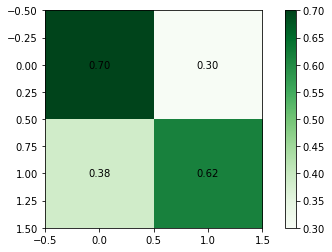

In [9]:
# Logistic Regression/Confusion Matrix
    # engagement (binary) - dependent variable
    # 'labels' and 'caption' - independent variables

caption_label_str = df['caption_label'].astype(str)
vectorizer = TfidfVectorizer()
cl_tfidf = vectorizer.fit_transform(caption_label_str)

x3 = cl_tfidf
y3 = df["high_low"]

X_train, X_test, y_train, y_test = train_test_split(x3, y3, test_size = 0.2, random_state = 50)

lr3 = LogisticRegression().fit(X_train, y_train)
y3_pred = lr3.predict(X_test)

print("Accuracy Score: " + str(accuracy_score(y_test, y3_pred)))

cmatrix(y_test, y3_pred, classes = np.unique(y_test), normalize = True, cmap = plt.cm.Greens)
plt.show()

The lowest accuracy was from regressing labels in order to predict binary engagement (0.549). Next, Using both captions and labels produced an accuracy score of 0.657. The greatest accuracy was returned from only captions (0.775). This was suprising to us as we thought that captions and labels would produce the largest accuracy. These results are surpising. They could be due to Zara followers caring more about the description of the product than the image characteristics.

### Task C

In [10]:
word_toke = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
n_topics = 8

def tokenize(tags):
    lowered = tags.lower()
    text = lemmatizer.lemmatize(lowered)
    tokened = word_toke.tokenize(text)
    return tokened

vectorized_words = CountVectorizer(tokenizer=tokenize, stop_words=stopwords, decode_error='ignore')
features = vectorized_words.fit_transform(df['labels'])

model = lda.LDA(n_topics = int(n_topics), n_iter = 500, random_state=1)
model.fit(features)    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
INFO:lda:n_documents: 507
INFO:lda:vocab_size: 516
INFO:lda:n_words: 5529
INFO:lda:n_topics: 8
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -50030
INFO:lda:<10> log likelihood: -31236
INFO:lda:<20> log likelihood: -30080
INFO:lda:<30> log likelihood: -29542
INFO:lda:<40> log likelihood: -29056
INFO:lda:<50> log likelihood: -28952
INFO:lda:<60> log likelihood: -28818
INFO:lda:<70> log likelihood: -28753
INFO:lda:<80> log likelihood: -28592
INFO:lda:<90> log likelihood: -28731
INFO:lda:<100> log likelihood: -28755
INFO:lda:<110> log likelihood: -28763
INFO:lda:<120> log likelihood: -28733
INFO:lda:<130> log likelihood: -28643
INFO:lda:<140> log likelihood: -28594
INFO:lda:<150> log likelih

In [11]:
topic_word = model.topic_word_
post_topic = model.doc_topic_
post_topic = pd.DataFrame(post_topic)
zara_df = df.join(post_topic)
zara_topic_df = pd.DataFrame()

In [12]:
#post_topic = post_topic.rename(columns={0: "upper body", 1: "portrait", 2: "black/white portrait", 3: "pants/shoes", 4: "model with dog", 5: "abstract", 6: "formal", 7: "photoshoot"})
post_topic.sort_values(by=0, ascending = False)

,0,1,2,3,4,5,6,7
142,0.952703,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757
141,0.952703,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757
360,0.952703,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757
174,0.949275,0.007246,0.007246,0.007246,0.007246,0.007246,0.007246,0.007246
361,0.949275,0.007246,0.007246,0.007246,0.007246,0.007246,0.007246,0.007246
...,...,...,...,...,...,...,...,...
443,0.005618,0.005618,0.005618,0.005618,0.005618,0.960674,0.005618,0.005618
390,0.005618,0.005618,0.005618,0.005618,0.005618,0.960674,0.005618,0.005618
282,0.005618,0.005618,0.005618,0.005618,0.005618,0.960674,0.005618,0.005618
228,0.005319,0.962766,0.005319,0.005319,0.005319,0.005319,0.005319,0.005319


In [13]:
labels = pd.DataFrame(topic_word)
labels.columns = vectorized_words.get_feature_names()
topics = labels.transpose()

In [20]:
topics.sort_values(by='formal wear', ascending = False)[:30]

,female model,formal wear,clothing/outerwear,black/white photo,portrait,shoes/footwear,artistic,shirts/tops
fashion,0.092789,0.125716,0.113729,0.000017,0.000021,0.000014,0.000024,0.082564
outerwear,0.021841,0.076020,0.041998,0.000017,0.000021,0.000014,0.000024,0.077978
clothing,0.028390,0.058480,0.074364,0.000017,0.000021,0.000014,0.000024,0.070334
coat,0.000011,0.057019,0.000009,0.000017,0.000021,0.000014,0.000024,0.000015
formal,0.000011,0.055557,0.000009,0.000017,0.000021,0.000014,0.000024,0.000015
wear,0.000011,0.055557,0.000009,0.000017,0.000021,0.000014,0.000024,0.000015
suit,0.000011,0.046787,0.000009,0.000017,0.000021,0.000014,0.000024,0.000015
standing,0.000011,0.036556,0.030626,0.033225,0.000021,0.000014,0.000024,0.000015
blazer,0.000011,0.036556,0.000009,0.000017,0.000021,0.000014,0.000024,0.000015
street,0.000011,0.033632,0.000009,0.014000,0.000021,0.000014,0.000024,0.000015


In [15]:
topics = topics.rename(columns={0: "female model",
                                1:"formal wear", 
                                2: "clothing/outerwear", 
                                3: "black/white photo",
                                4: "portrait",
                                5: "shoes/footwear",
                                6: "artistic",
                                7: "shirts/tops"})
zara_df = zara_df.rename(columns={0: "female model", 
                                  1:"formal wear", 
                                  2: "clothing/outerwear", 
                                  3: "black/white photo",
                                  4: "portrait",
                                  5: "shoes/footwear",
                                  6: "artistic",
                                  7: "shirts/tops"})

In [16]:
# print topic loadings
topics.to_csv("topic_lda.csv")
post_topic.to_csv("post_topic.csv")

In [17]:
zara_df.sort_values(by='engagement', ascending = False)

,display_url,caption,is_video,likes,comments,labels,n_likes,n_comments,engagement,high_low,caption_label,female model,formal wear,clothing/outerwear,black/white photo,portrait,shoes/footwear,artistic,shirts/tops
34,https://scontent-dfw5-2.cdninstagram.com/v/t51...,We stand for equality,False,85040,3246,"['Text', 'Black', 'Font', 'Darkness', 'Light',...",0.290144,1.000000,0.716058,1,Text Black Font Darkness Light Logo Black and ...,0.093220,0.008475,0.008475,0.093220,0.008475,0.008475,0.771186,0.008475
279,https://scontent-dfw5-2.cdninstagram.com/v/t51...,Celebrate yourself this season! #zaratrf Thank...,False,268938,873,"['Footwear', 'White', 'Brown', 'Leg', 'Shoe', ...",0.917576,0.268946,0.528398,1,Footwear White Brown Leg Shoe Human leg Boot H...,0.007813,0.007813,0.085938,0.085938,0.007813,0.710938,0.007813,0.085938
389,https://scontent-dfw5-2.cdninstagram.com/v/t51...,Celebrate yourself this season! #zaratrf Thank...,False,268937,873,"['Footwear', 'White', 'Brown', 'Leg', 'Shoe', ...",0.917573,0.268946,0.528397,1,Footwear White Brown Leg Shoe Human leg Boot H...,0.320313,0.007813,0.007813,0.007813,0.007813,0.632813,0.007813,0.007813
331,https://scontent-dfw5-2.cdninstagram.com/v/t51...,The Autumn approaches and the Bourgeois trend ...,False,293096,571,"['Clothing', 'Collar', 'Neck', 'Fashion', 'Out...",1.000000,0.175909,0.505545,1,Clothing Collar Neck Fashion Outerwear Blouse ...,0.101852,0.009259,0.009259,0.009259,0.009259,0.009259,0.009259,0.842593
497,https://scontent-dfw5-2.cdninstagram.com/v/t51...,ZARA SRPLS | New sweatshirts are now available...,False,39560,2408,"['Clothing', 'T-shirt', 'Sleeve', 'Neck', 'Lon...",0.134973,0.741836,0.499091,1,Clothing T shirt Sleeve Neck Long sleeved t sh...,0.085938,0.007813,0.164063,0.007813,0.007813,0.007813,0.007813,0.710938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,https://scontent-dfw5-1.cdninstagram.com/v/t51...,ZARA SRPLS | CLLCTN 03 | DRP01 available tomor...,False,20539,75,"['Military uniform', 'Design', 'Soldier', 'Pat...",0.070076,0.023105,0.041894,0,Military uniform Design Soldier Pattern Unifor...,0.012821,0.012821,0.012821,0.012821,0.012821,0.012821,0.012821,0.910256
356,https://scontent-dfw5-2.cdninstagram.com/v/t51...,ZARA SCENES | Chapter 03. She takes a car to t...,False,19531,77,"['Black', 'Standing', 'Leg', 'Shoulder', 'Blac...",0.066637,0.023722,0.040888,0,Black Standing Leg Shoulder Black and white Fa...,0.297101,0.007246,0.442029,0.007246,0.007246,0.152174,0.079710,0.007246
403,https://scontent-dfw5-1.cdninstagram.com/v/t51...,MADE TO MOVE | Geared towards the contemporary...,False,21277,57,"['Leg', 'Thigh', 'Photo shoot', 'Sitting', 'Be...",0.072594,0.017560,0.039574,0,Leg Thigh Photo shoot Sitting Beauty Pink Fash...,0.442029,0.007246,0.152174,0.007246,0.007246,0.369565,0.007246,0.007246
405,https://scontent-dfw5-2.cdninstagram.com/v/t51...,VIEW.S | Five of the second-year students have...,False,20818,57,"['Photograph', 'Photography', 'Stock photograp...",0.071028,0.017560,0.038947,0,Photograph Photography Stock photography Jacke...,0.011364,0.011364,0.125000,0.806818,0.011364,0.011364,0.011364,0.011364


In [23]:
zara_df.describe()

,likes,comments,n_likes,n_comments,engagement,high_low,female model,formal wear,clothing/outerwear,black/white photo,portrait,shoes/footwear,artistic,shirts/tops
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,81162.280079,322.439842,0.276914,0.099335,0.170366,0.499014,0.151910,0.116385,0.198616,0.100255,0.091458,0.130696,0.087829,0.122850
std,47964.518783,277.116865,0.163648,0.085372,0.097149,0.500493,0.244899,0.238407,0.289367,0.197846,0.211672,0.237550,0.190379,0.235004
min,17399.000000,53.000000,0.059363,0.016328,0.034651,0.000000,0.005319,0.005618,0.005319,0.005319,0.005319,0.005319,0.005319,0.005319
25%,47318.500000,174.500000,0.161444,0.053758,0.105639,0.000000,0.008475,0.007813,0.008475,0.007813,0.007813,0.007813,0.007813,0.007813
50%,68236.000000,253.000000,0.232811,0.077942,0.144071,0.000000,0.009259,0.009259,0.012821,0.009259,0.008475,0.008475,0.008475,0.008475
75%,96079.000000,378.500000,0.327807,0.116605,0.209511,1.000000,0.231637,0.031015,0.320313,0.093220,0.014706,0.112245,0.017241,0.093220
max,293096.000000,3246.000000,1.000000,1.000000,0.716058,1.000000,0.952703,0.962766,0.945312,0.952703,0.955696,0.960674,0.949275,0.945312


In [26]:
df_lowerq_avg = zara_df[zara_df['engagement'] <= 0.105639].drop(columns = ['engagement',
                                                                           'likes','comments',
                                                                           'n_likes','n_comments',
                                                                           'high_low','is_video']).mean()
df_upperq_avg = zara_df[zara_df['engagement'] >= 0.209511].drop(columns = ['engagement',
                                                                           'likes','comments',
                                                                           'n_likes','n_comments',
                                                                           'high_low','is_video']).mean()

In [37]:
final_table = pd.concat([df_lowerq_avg , df_upperq_avg], axis=1)

final_table = final_table.rename(columns={0: 'lower_quartile_avg', 
                                          1: 'upper_quartile_avg'}).sort_values(by='upper_quartile_avg', 
                                                                                ascending = False).T

final_table

,clothing/outerwear,female model,shoes/footwear,shirts/tops,formal wear,artistic,portrait,black/white photo
lower_quartile_avg,0.154157,0.110858,0.109426,0.112543,0.133338,0.100704,0.126675,0.152299
upper_quartile_avg,0.231899,0.176600,0.142004,0.136168,0.112199,0.091067,0.059522,0.050542


The average weights of the topics for the lower quartile, beside clothing/outerwear, are highest for: black/white photo, formal wear, and portrait.

The average weights of the topics for the upper quartile, beside clothing/outerwear, are highest for: female model, shoes/footwear, and shirts/tops.

There is distinction between the two quartiles in that the top three topics, other than clothing/outerwear, for one do not overlap with the top three topics in the other.

### Task D

Ironically, despite Instagram being a photo-driven social media platform. From our analysis of the captions and the labels associated with the photos, we found that captions that contained certain words were a better predictor of engagement with a given post than what was actually in the image. We reason that this is likely because users who follow Zara on Instagram are more interested in the fashion itself, either about new clothing lines or information about the company, than they are about the actual contents of the photo.  

In fact, when we conducted topic modeling of the images, topics about the model, clothing, and footwear were most frequent among the highly engaging posts. However, not all fashion was highly engaging. Formal wear was a frequent topic of lower engaging posts. Other topics in low engaging posts include black and white photos and portraits. This may be due to customers not liking Zara's formal wear and being more interested in causal fashion than photography.

We take from this analysis that users are more likely to be engaged with Zara's account when Zara posts photos that are focused on casual fashion with an attractive model. Fancy photography and portrait photos are not the drivers of engagement. Additionally, Zara's formal wear photos should be more vibrant while including an attractive, blond female model.